<a href="https://colab.research.google.com/github/Nawshin-25/Saint_Martin/blob/main/Anomaly(00_20).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install -y libproj-dev proj-data proj-bin
!apt-get install -y libgeos-dev
!pip install cartopy

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libproj-dev is already the newest version (9.1.1-1~jammy0).
libproj-dev set to manually installed.
proj-data is already the newest version (9.1.1-1~jammy0).
proj-data set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 197 kB of archives.
After this operation, 504 kB of additional disk space will be used.
Get:1 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 proj-bin amd64 9.1.1-1~jammy0 [197 kB]
Fetched 197 kB in 1s (150 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 123629 files and directories currently installed.)
Preparing to unpack .../proj-bin_9.1.1-1~jammy0_amd64.deb ...
Unpacking proj-bin (9.1.1-1~jammy0) ...
Setting up proj-bin (9.1.1-1~jammy0) ...
Processing triggers for man-db (2.10.2-1) ...
Reading package lists... Don

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import geopandas as gpd
import cartopy.crs as ccrs

In [32]:
file_name = '/content/drive/MyDrive/Data/ReAn(00-20).nc'
ds = xr.open_dataset(file_name)
temperature = ds['thetao']
salinity = ds['so']

In [30]:
saint_martins_shape = gpd.read_file('/content/drive/MyDrive/Data/2021/Total_area_2021.shp')
mpa_border_shape = gpd.read_file('/content/drive/MyDrive/Data/2021/Saint_Martin MPA.shp')

# **Winter**

<ipython-input-21-2247d8285a8c>:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to leave space for the colorbar


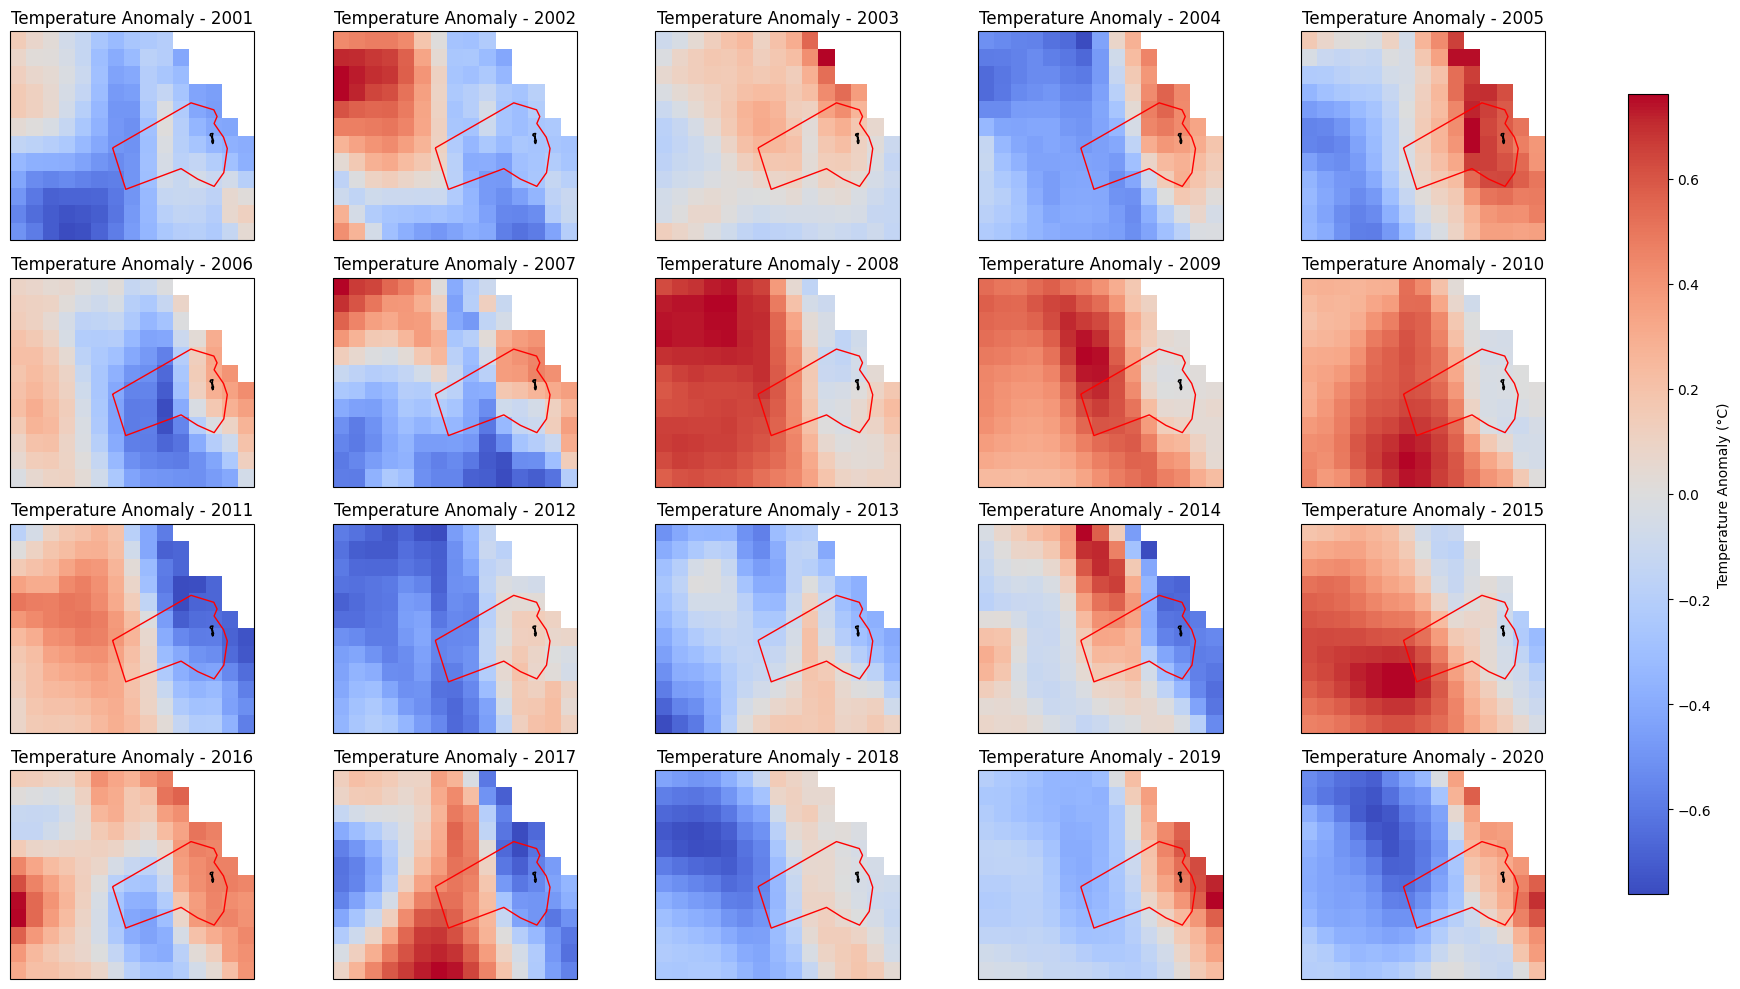

In [21]:
time_winter = temperature['time'].sel(time=((temperature['time.year'] >= 2000) & (temperature['time.year'] <= 2020) &
                                              ((temperature['time.month'] == 1) |
                                               (temperature['time.month'] == 11) |
                                               (temperature['time.month'] == 12))))

temperature = temperature.sel(time=time_winter)
temperature_anomaly = temperature - temperature.mean(dim='time')
temperature_anomaly_mean = temperature_anomaly.groupby('time.year').mean(dim='time')

# Plot temperature anomaly for each year with a central shared colorbar
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})
cmap = 'coolwarm'

# Loop over the years
for i, year in enumerate(range(2001, 2021, 1)):
    ax = axes.flatten()[i]

    # Plot temperature anomaly
    temp_plot = temperature_anomaly_mean.sel(year=year).isel(depth=0).plot(
        ax=ax,
        cmap=cmap,
        add_colorbar=False  # Disable individual colorbars
    )

    # Overlay the shapefiles
    saint_martins_shape.boundary.plot(ax=ax, color='black', linewidth=1)
    mpa_border_shape.boundary.plot(ax=ax, color='red', linewidth=1)

    # Title and labels
    ax.set_title(f'Temperature Anomaly - {year}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

# Add a shared central colorbar
cbar_ax = fig.add_axes([0.85, 0.1, 0.02, 0.8])  # Adjust position and size for a central vertical colorbar
fig.colorbar(temp_plot, cax=cbar_ax, label='Temperature Anomaly (°C)')

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to leave space for the colorbar
plt.show()

# **Premonsoon**

<ipython-input-25-aea26458dd5c>:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to leave space for the colorbar


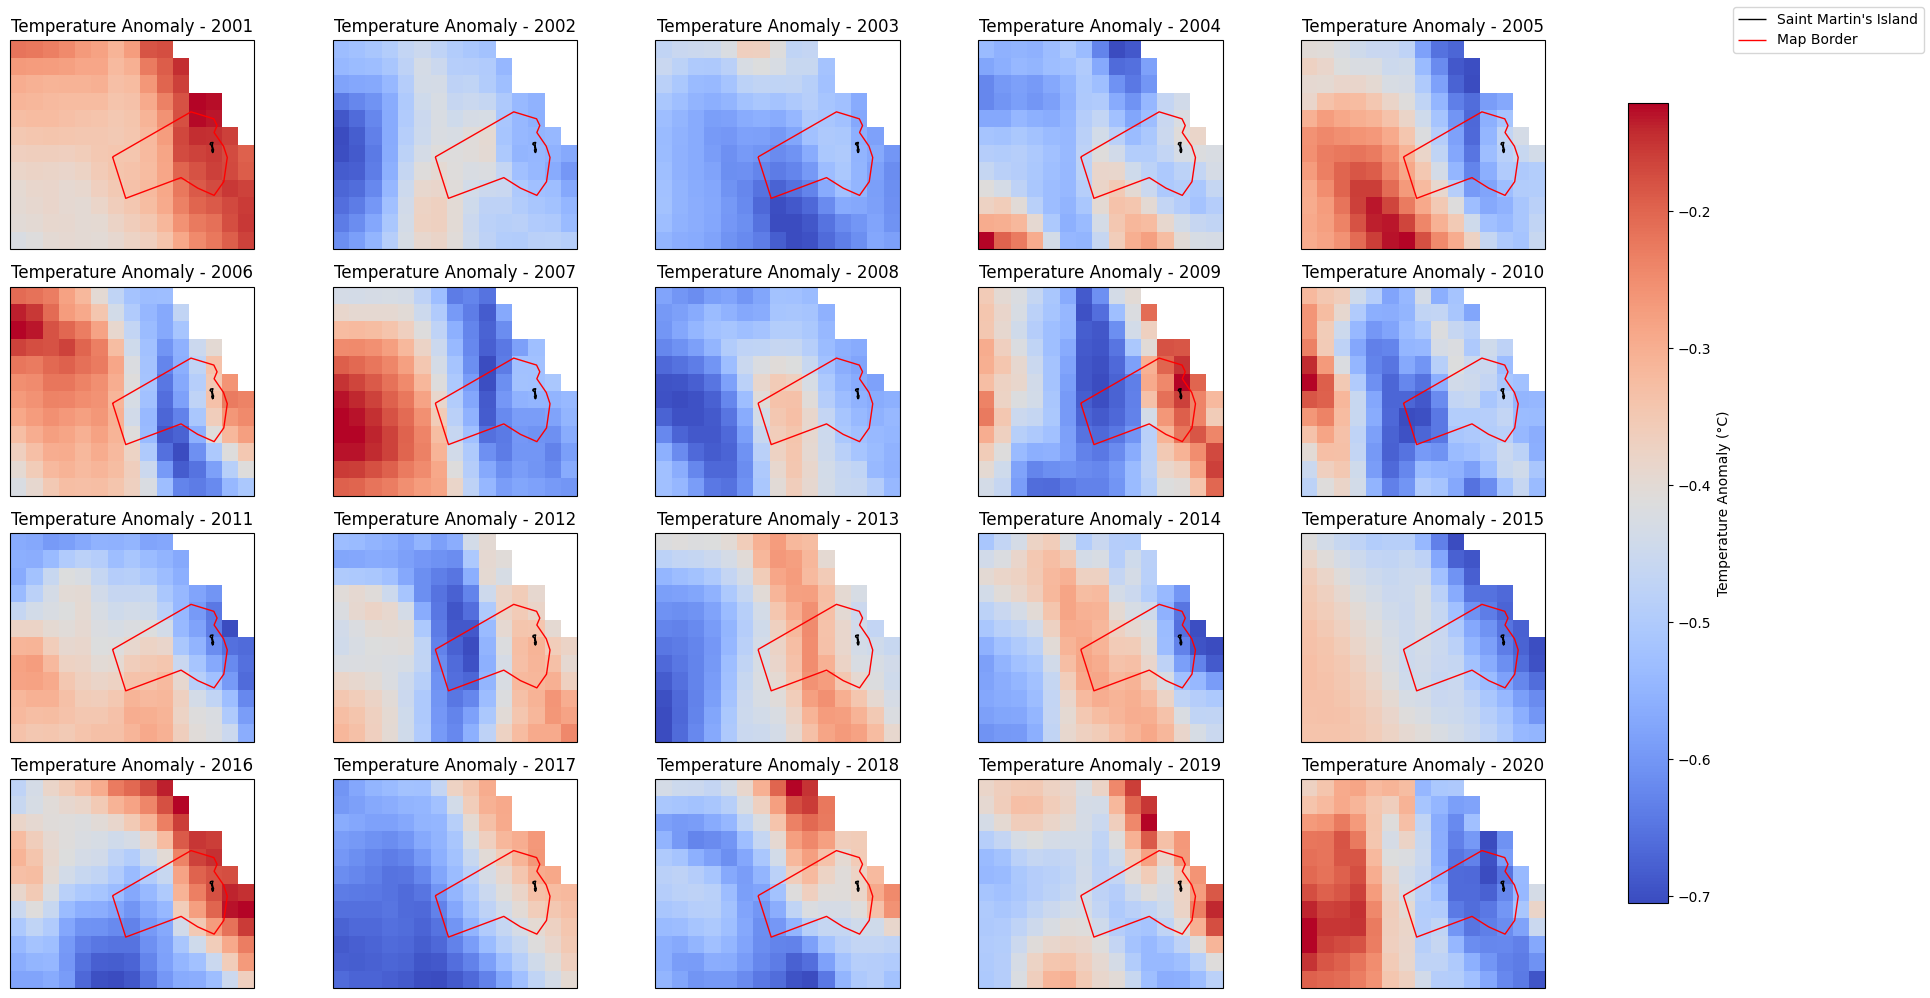

In [25]:
time_premon = temperature['time'].sel(time=((temperature['time.year'] >= 2000) & (temperature['time.year'] <= 2020) &
                                              ((temperature['time.month'] == 2) |
                                               (temperature['time.month'] == 3) |
                                               (temperature['time.month'] == 4))))

temperature = temperature.sel(time=time_premon)
temperature_anomaly = temperature - temperature.mean(dim='time')
temperature_anomaly_mean = temperature_anomaly.groupby('time.year').mean(dim='time')

# Plot temperature anomaly for each year with a central shared colorbar
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})
cmap = 'coolwarm'

# Loop over the years
for i, year in enumerate(range(2001, 2021, 1)):
    ax = axes.flatten()[i]

    # Plot temperature anomaly
    temp_plot = temperature_anomaly_mean.sel(year=year).isel(depth=0).plot(
        ax=ax,
        cmap=cmap,
        add_colorbar=False  # Disable individual colorbars
    )

    # Overlay the shapefiles
    saint_martins_shape.boundary.plot(ax=ax, color='black', linewidth=1)
    mpa_border_shape.boundary.plot(ax=ax, color='red', linewidth=1)

    # Title and labels
    ax.set_title(f'Temperature Anomaly - {year}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

# Add a shared central colorbar
cbar_ax = fig.add_axes([0.85, 0.1, 0.02, 0.8])  # Adjust position and size for a central vertical colorbar
fig.colorbar(temp_plot, cax=cbar_ax, label='Temperature Anomaly (°C)')

# Add a shared legend for the shapefiles
fig.legend(['Saint Martin\'s Island', 'Map Border'], loc='upper right')

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to leave space for the colorbar
plt.show()

# **Monsoon**

<ipython-input-28-5dd03bee7a74>:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to leave space for the colorbar


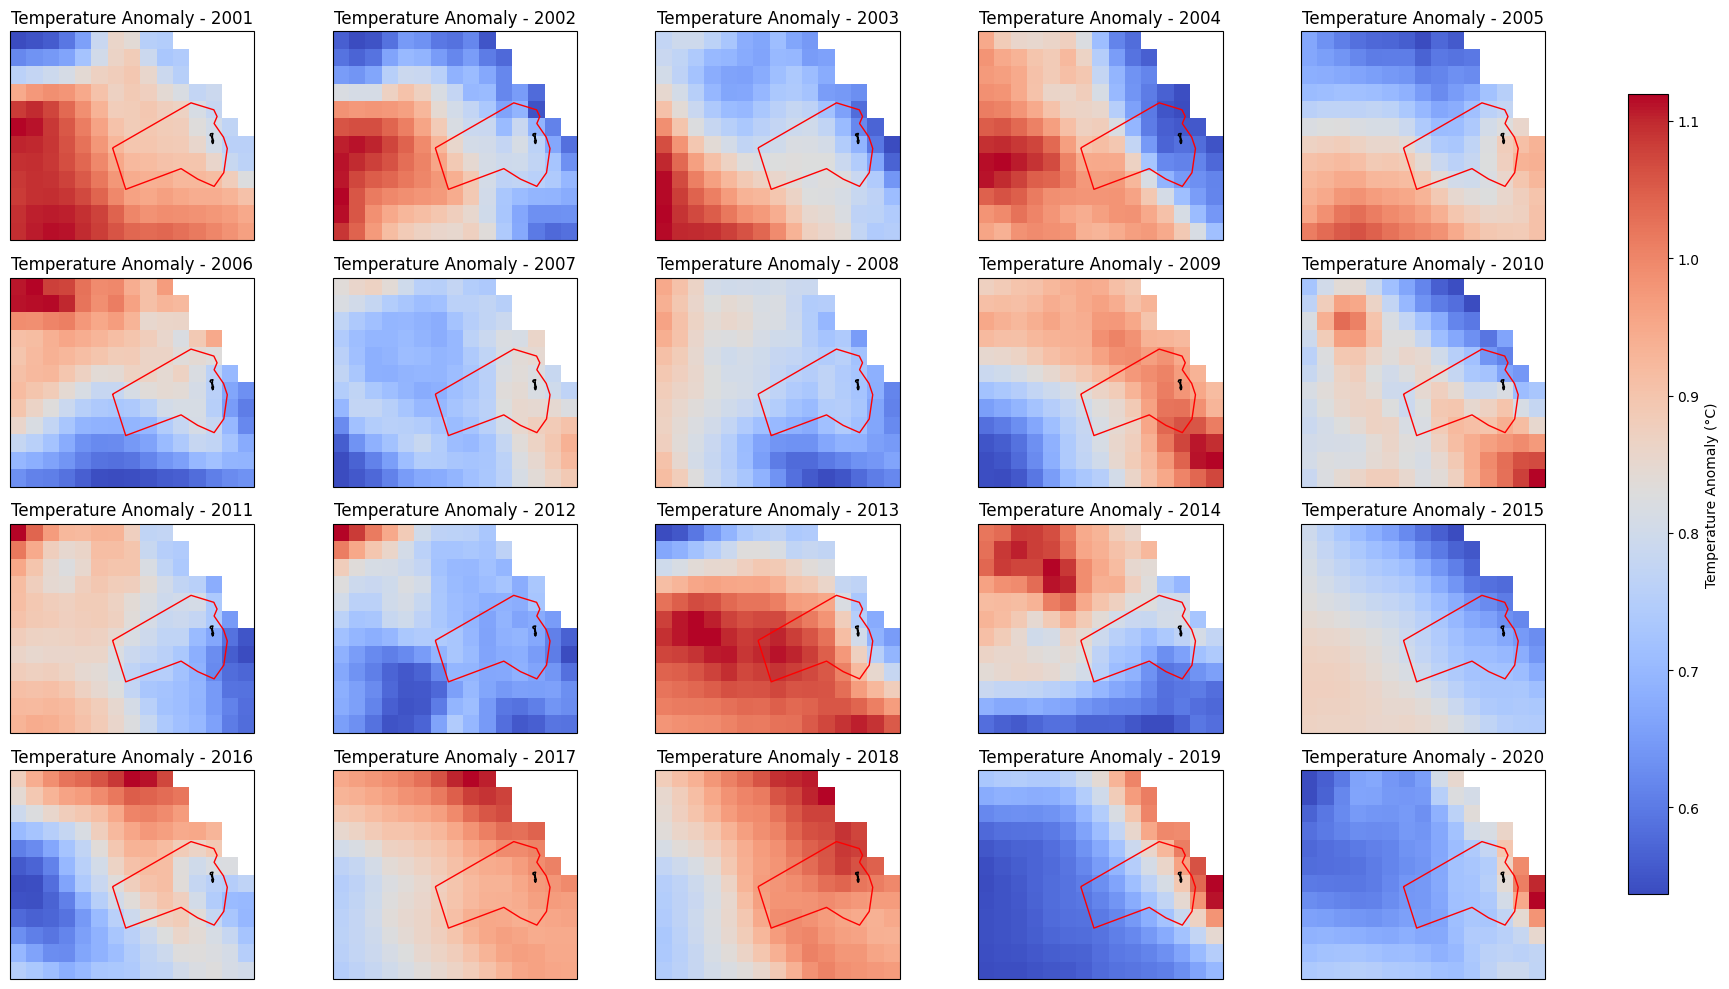

In [28]:
time_monsoon = temperature['time'].sel(time=((temperature['time.year'] >= 2000) & (temperature['time.year'] <= 2020) &
                                              ((temperature['time.month'] == 5) |
                                               (temperature['time.month'] == 6) |
                                               (temperature['time.month'] == 7))))

temperature = temperature.sel(time=time_monsoon)
temperature_anomaly = temperature - temperature.mean(dim='time')
temperature_anomaly_mean = temperature_anomaly.groupby('time.year').mean(dim='time')

# Plot temperature anomaly for each year with a central shared colorbar
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})
cmap = 'coolwarm'

# Loop over the years
for i, year in enumerate(range(2001, 2021, 1)):
    ax = axes.flatten()[i]

    # Plot temperature anomaly
    temp_plot = temperature_anomaly_mean.sel(year=year).isel(depth=0).plot(
        ax=ax,
        cmap=cmap,
        add_colorbar=False  # Disable individual colorbars
    )

    # Overlay the shapefiles
    saint_martins_shape.boundary.plot(ax=ax, color='black', linewidth=1)
    mpa_border_shape.boundary.plot(ax=ax, color='red', linewidth=1)

    # Title and labels
    ax.set_title(f'Temperature Anomaly - {year}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

# Add a shared central colorbar
cbar_ax = fig.add_axes([0.85, 0.1, 0.02, 0.8])  # Adjust position and size for a central vertical colorbar
fig.colorbar(temp_plot, cax=cbar_ax, label='Temperature Anomaly (°C)')

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to leave space for the colorbar
plt.show()

# **Postmonsoon**

<ipython-input-31-7d59e3c6dceb>:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to leave space for the colorbar


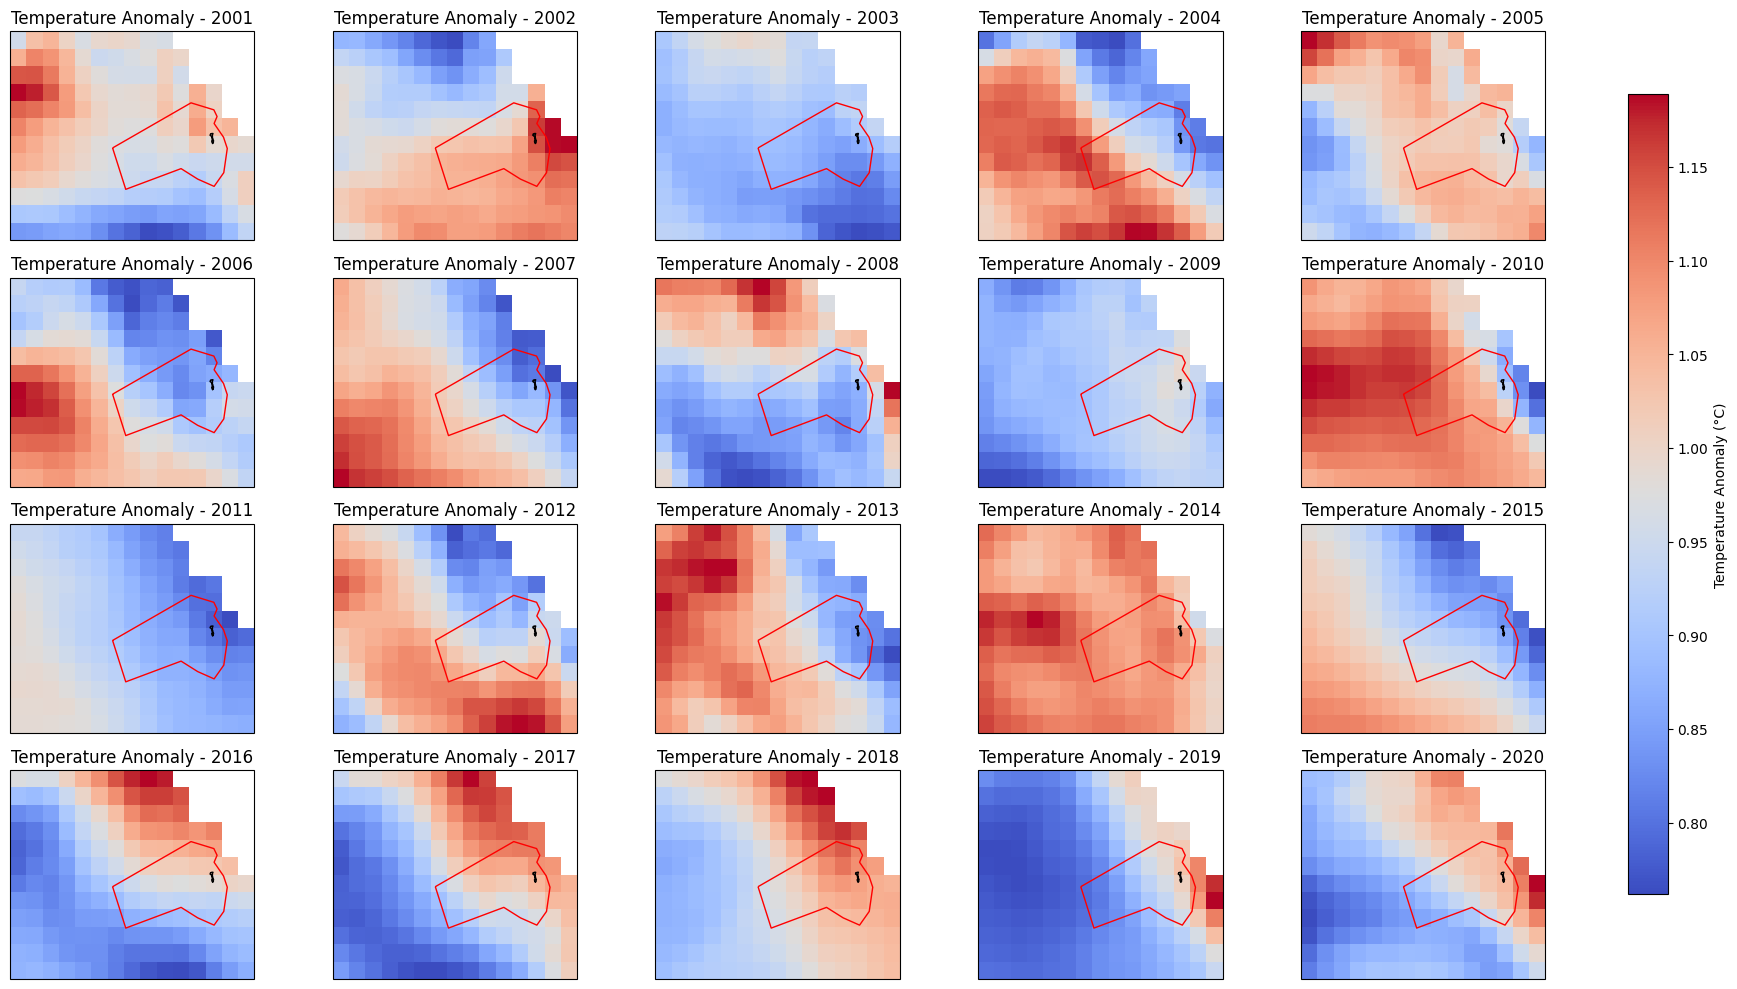

In [31]:
time_postmon = temperature['time'].sel(time=((temperature['time.year'] >= 2000) & (temperature['time.year'] <= 2020) &
                                              ((temperature['time.month'] == 8) |
                                               (temperature['time.month'] == 9) |
                                               (temperature['time.month'] == 10))))

temperature = temperature.sel(time=time_postmon)
temperature_anomaly = temperature - temperature.mean(dim='time')
temperature_anomaly_mean = temperature_anomaly.groupby('time.year').mean(dim='time')

# Plot temperature anomaly for each year with a central shared colorbar
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})
cmap = 'coolwarm'

# Loop over the years
for i, year in enumerate(range(2001, 2021, 1)):
    ax = axes.flatten()[i]

    # Plot temperature anomaly
    temp_plot = temperature_anomaly_mean.sel(year=year).isel(depth=0).plot(
        ax=ax,
        cmap=cmap,
        add_colorbar=False  # Disable individual colorbars
    )

    # Overlay the shapefiles
    saint_martins_shape.boundary.plot(ax=ax, color='black', linewidth=1)
    mpa_border_shape.boundary.plot(ax=ax, color='red', linewidth=1)

    # Title and labels
    ax.set_title(f'Temperature Anomaly - {year}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

# Add a shared central colorbar
cbar_ax = fig.add_axes([0.85, 0.1, 0.02, 0.8])  # Adjust position and size for a central vertical colorbar
fig.colorbar(temp_plot, cax=cbar_ax, label='Temperature Anomaly (°C)')

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to leave space for the colorbar
plt.show()

In [33]:
time_filtered = ds.time.sel(time=slice('2000-01-01', '2020-12-31'))
lat_idx = 0  # Select the first latitude index
lon_idx = 0  # Select the first longitude index
depth_idx = 0  # Select the first depth index (surface)

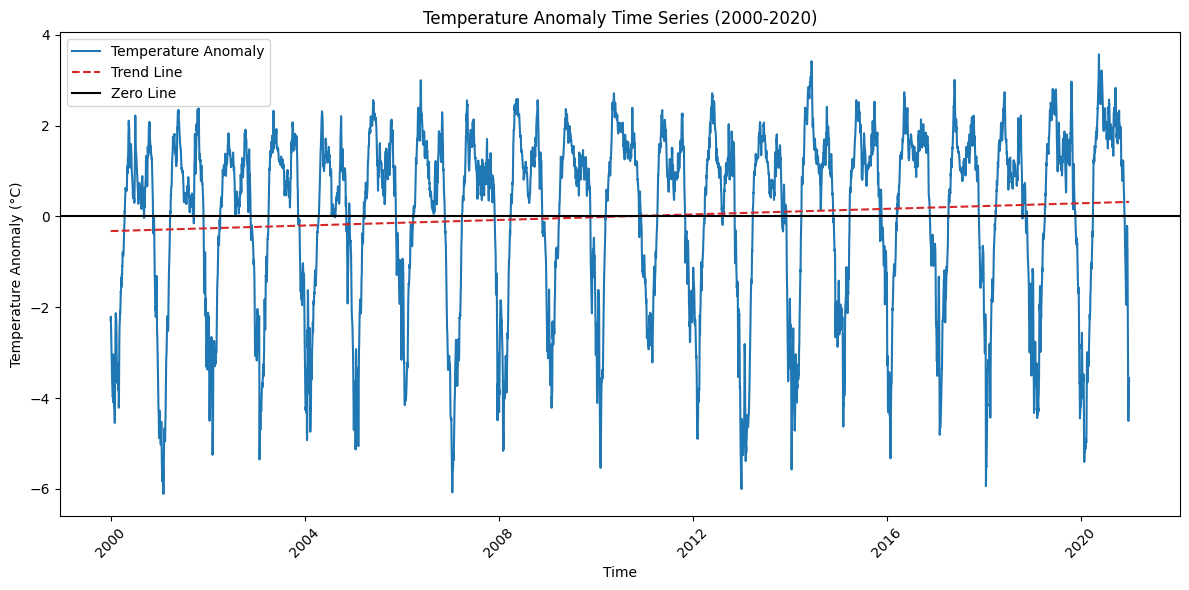

In [34]:
temperature_anomaly = temperature - temperature.mean(dim='time')
# Extract the anomalies for the chosen lat-lon point
temperature_anomaly_timeseries = temperature_anomaly.sel(time=time_filtered, latitude=ds.latitude[lat_idx], longitude=ds.longitude[lon_idx], depth=ds.depth[depth_idx])

time_numeric = np.arange(len(temperature_anomaly_timeseries.time))
trend_coeffs = np.polyfit(time_numeric, temperature_anomaly_timeseries, 1)
trend_line = np.polyval(trend_coeffs, time_numeric)

# Plot Temperature Anomaly Time Series
plt.figure(figsize=(12, 6))
plt.plot(temperature_anomaly_timeseries.time, temperature_anomaly_timeseries, label='Temperature Anomaly', color='tab:blue')
plt.plot(temperature_anomaly_timeseries.time, trend_line, label='Trend Line', color='tab:red', linestyle='--')
plt.axhline(0, color='black', linestyle='-', label='Zero Line')
plt.title('Temperature Anomaly Time Series (2000-2020)')
plt.xlabel('Time')
plt.ylabel('Temperature Anomaly (°C)')
plt.grid(False)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

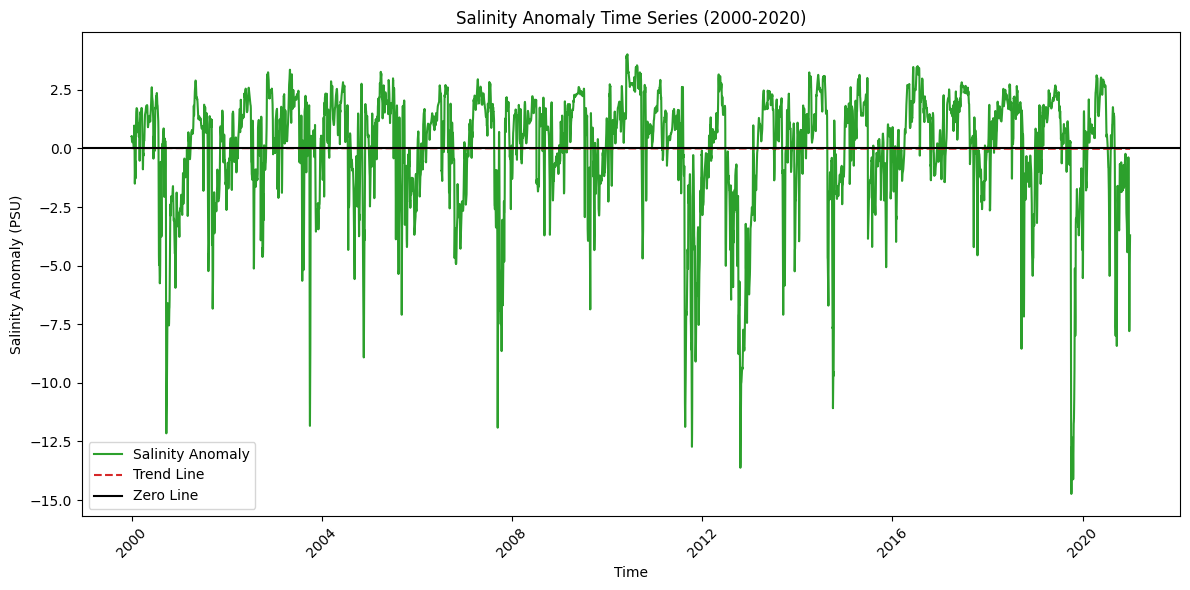

In [35]:
salinity_anomaly = salinity - salinity.mean(dim='time')
salinity_anomaly_timeseries = salinity_anomaly.sel(time=time_filtered, latitude=ds.latitude[lat_idx], longitude=ds.longitude[lon_idx], depth=ds.depth[depth_idx])

time_numeric = np.arange(len(salinity_anomaly_timeseries.time))
trend_coeffs = np.polyfit(time_numeric, salinity_anomaly_timeseries, 1)
trend_line = np.polyval(trend_coeffs, time_numeric)

# Plot Salinity Anomaly Time Series
plt.figure(figsize=(12, 6))
plt.plot(salinity_anomaly_timeseries.time, salinity_anomaly_timeseries, label='Salinity Anomaly', color='tab:green')
plt.plot(salinity_anomaly_timeseries.time, trend_line, label='Trend Line', color='tab:red', linestyle='--')
plt.axhline(0, color='black', linestyle='-', label='Zero Line')
plt.title('Salinity Anomaly Time Series (2000-2020)')
plt.xlabel('Time')
plt.ylabel('Salinity Anomaly (PSU)')
plt.grid(False)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

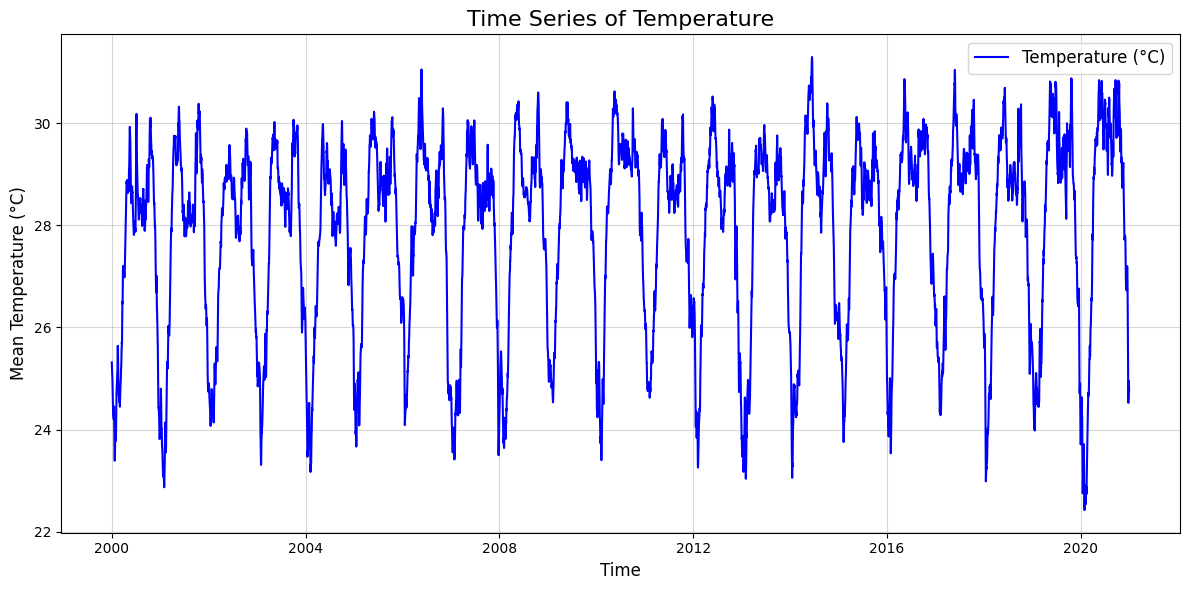

In [37]:
temperature_mean = temperature.mean(dim=['latitude', 'longitude', 'depth'])

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(temperature_mean['time'], temperature_mean, label='Temperature (°C)', color='blue')

# Add labels and title
plt.title('Time Series of Temperature', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Mean Temperature (°C)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

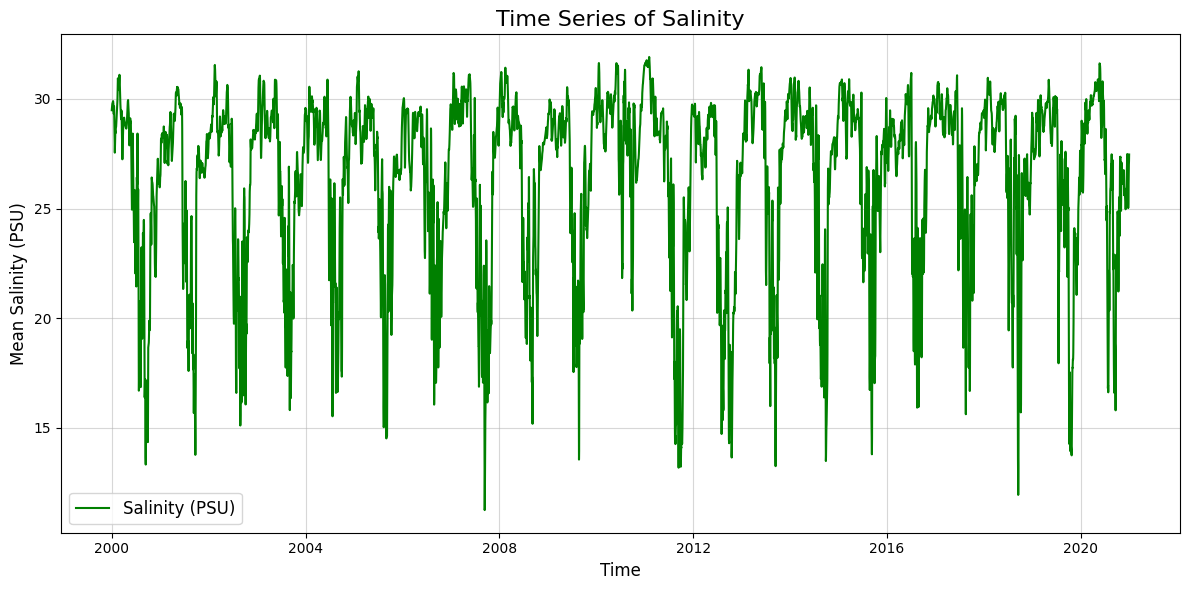

In [38]:
salinity_mean = salinity.mean(dim=['latitude', 'longitude', 'depth'])

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(salinity_mean['time'], salinity_mean, label='Salinity (PSU)', color='green')

# Add labels and title
plt.title('Time Series of Salinity', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Mean Salinity (PSU)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()